In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def findNeighbors(A, node):
    return [node]

A = [[0,1,1,0,0,0,0],
     [1,0,0,1,0,0,0],
     [1,0,0,1,0,0,0],
     [0,1,1,0,1,1,1],
     [0,0,0,1,0,0,0],
     [0,0,0,1,0,0,1],
     [0,0,0,1,0,1,0]]

print(findNeighbors(A, 3))

[3]


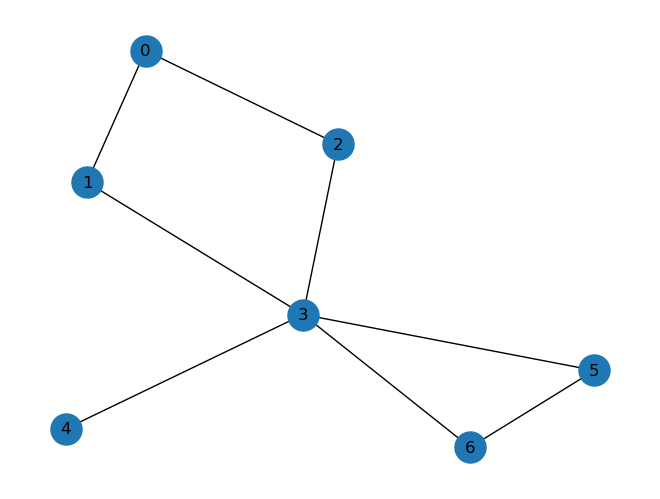

In [2]:
def show_graph(adjmat):
    adjmat = np.matrix(adjmat)
    rows, cols = np.where(adjmat > 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    plt.show()

show_graph(A)

In [ ]:
def findNeighbors(graph, node, seen):
    neighbors = []
    for idx, adj in enumerate(graph[node]):
        if idx in seen:
            continue
        if adj:
            neighbors.append(idx)
    return neighbors

def findKNeighbors(graph, node, k):
    toSearch = [node]
    searched = []
    for _ in range(k):
        layer = len(toSearch)
        for node in toSearch[len(searched):layer +  1]:
            toSearch.extend(findNeighbors(graph, node, toSearch + searched))
        searched.extend([toSearch[len(searched):layer +  1]])
    return toSearch


findKNeighbors(A, 3, 100)

[3, 1, 2, 4, 5, 6, 0]

In [4]:
def findKNeighbors(graph, node, k):
    seen = [node]
    for _ in range(k):
        seen.extend(findNeighbors(graph, node, seen))
        graph = np.dot(graph, graph)
    return seen
findKNeighbors(A, 3, 200)



[3, 1, 2, 4, 5, 6, 0]

In [5]:

def show_grid(graph):
    plt.figure(figsize=(6,6))
    pos = {(x,y):(y,-x) for x,y in graph.nodes()}
    nx.draw(graph, pos=pos, 
            node_color='lightgreen', 
            with_labels=True,
            node_size=600)


In [6]:
def gen_grid_graph(grid):
    width = len(grid[0])
    height = len(grid)
    G = nx.grid_graph(dim=(width,height))
    for i in range(height):
        for j in range(width):
            if grid[i][j] == -1:
                G.remove_node((i,j))
                continue
            G.nodes[(i,j)]['value'] = grid[i][j]
    show_grid(G)

    return G
    

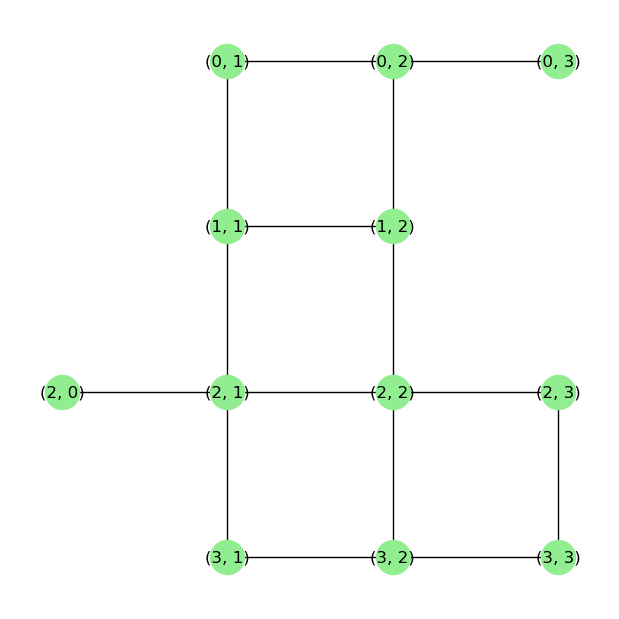

In [7]:
myGraph =  [
    [-1, 1, 0, 0],
    [-1, 1, 0, -1],
    [1, 0, -2, 0],
    [-1, 1, 0, 0]
 ]
gen_grid_graph(myGraph)